In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## **Data Preprocessing**

### LOADING THE DATASET

Reference of the dataset : https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf  
Dataset and methodology followed is decribed in greater detail in the above cited link.


In [ ]:
# we will load the cifar10 dataset from keras
# reference : https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf
# dataset and methodology followed is decribed in greater detail in the above cited link.
from keras.datasets import cifar10

(X_train, y_train),(X_test, y_test) = cifar10.load_data()


ABOUT THE DATASET -


*   The dataset has 50000 training samples and 10000 test samples
*   cifar10 implies 10 class labels (or target labels)
*   Each sample has the shape (32,32,3)
*   Pixels in 32X32 images are indexed in values of three channels of Red, Blue and Green



In [ ]:
print(f'Shape of the training set (features): {X_train.shape}')
print(f'Shape of the training set (target): {y_train.shape}')
print(f'Shape of the test set (features): {X_test.shape}')
print(f'Shape of the test set (target): {y_test.shape}')


Shape of the training set (features): (50000, 32, 32, 3)
Shape of the training set (target): (50000, 1)
Shape of the test set (features): (10000, 32, 32, 3)
Shape of the test set (target): (10000, 1)


### Visualizing the image set

Text(0.5, 1.0, 'A single image')

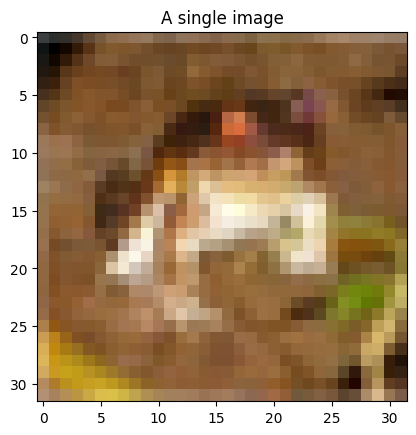

In [ ]:
#plotting the first sample of the trainging set
plt.imshow(X_train[0])
plt.title('A single image')

In [ ]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


The target set contains integer class labels representing one of the ten classes in the CIFAR-10 dataset.



In [ ]:
# These are the classnames in the dataset in the order
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


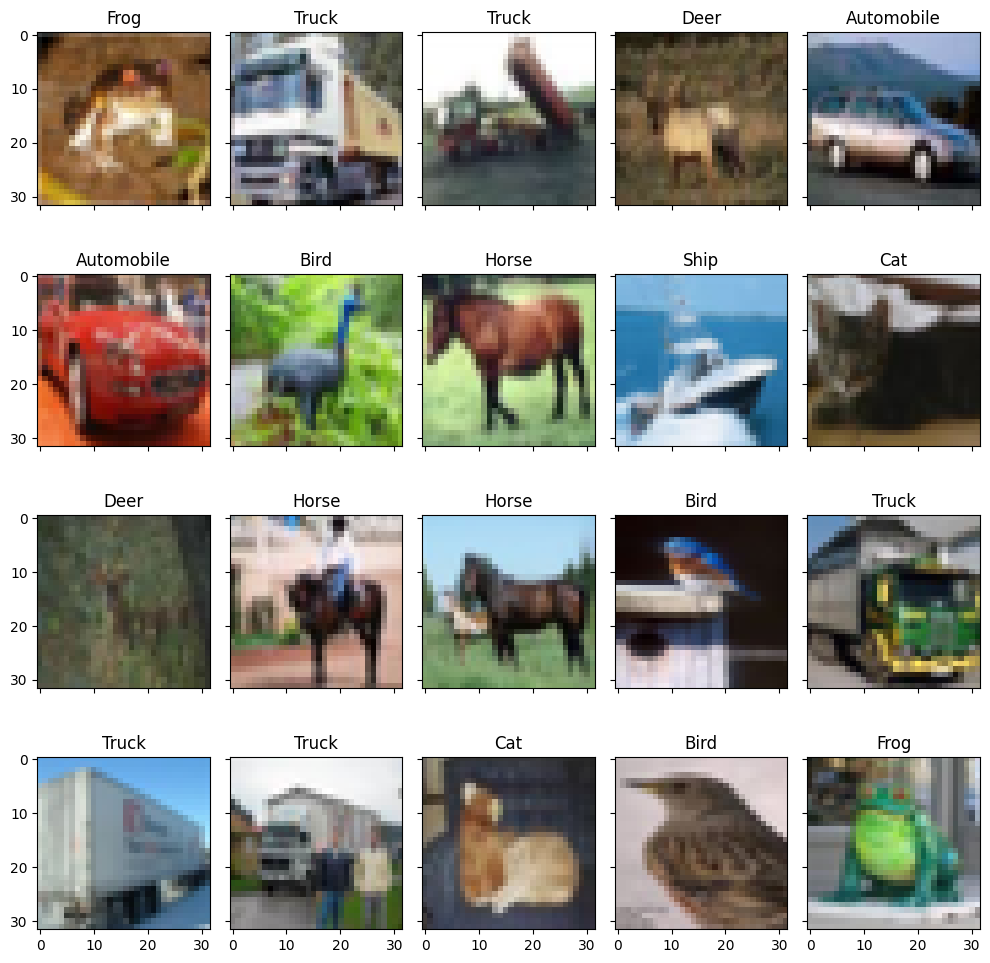

In [ ]:
#making a subplot of first few images

fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10,10), sharex=True, sharey=True)
for i, ax in enumerate(axs.flatten()):
  ax.imshow(X_train[i])
  ax.set_title(class_names[y_train[i][0]])

plt.tight_layout()
plt.show()

Data Normalisation

In [ ]:
# Flattening the features array
# Flattening is typically done as traditional ml models require input in 2-d format
# more on the 2-d format - each row represents a single sample (image) and each column represents a feature (pixel).
print(f"here is X_train's shape before Flattening \n{X_train.shape}")
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print(f"here is X_train's shape after Flattening \n{X_train_flat.shape}")
# As the pixel values in rgb channel of feature set range from 0-255 we are scaling it down to 0.0-1.0

min_value = np.min(X_train_flat)
max_value = np.max(X_train_flat)
# Perform min-max normalization
X_train_normalized = (X_train_flat - min_value) / (max_value - min_value)
X_test_normalized = (X_test_flat - min_value) / (max_value - min_value)

here is X_train's shape before Flattening 
(50000, 32, 32, 3)
here is X_train's shape after Flattening 
(50000, 3072)


In [ ]:
print(f'Here is the y_train before Flattening : \n',y_train)
print(f'Here is the shape of y_train before Flattening : ',y_train.shape)


# Flatten target labels
y_train = np.ravel(y_train)
print(f"\nHere is y_train after Flattening \n{y_train} \n and it's shape after Flattening\n{y_train.shape}")

print('\nSimilar process is for y_test')
y_test = np.ravel(y_test)

here is the y_train before Flattening : 
 [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
here is the shape of y_train before Flattening :  (50000, 1)

here is y_train after Flattening 
[6 9 9 ... 9 1 1] 
 and it's shape after Flattening
(50000,)

similar process is for y_test


## **Testing some classical machine learning models**

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn_classifier.fit(X_train_normalized, y_train)

# Predict labels for test set
y_pred = knn_classifier.predict(X_test_normalized)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy of KNN:", accuracy)
print("Precision of KNN:", precision)
print("Recall of KNN:", recall)
print("F1 Score of KNN:", f1)


Accuracy of KNN: 0.3398
Precision of KNN: 0.4304261825528496
Recall of KNN: 0.3398
F1 Score of KNN: 0.3260170986061005


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
# Train Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_normalized, y_train)

# Predict labels for test set
y_pred_decision_tree = decision_tree_model.predict(X_test_normalized)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

print("Accuracy of Decision Tree Classifier:", accuracy_decision_tree)
print("Precision of Decision Tree Classifier:", precision_decision_tree)
print("Recall of Decision Tree Classifier:", recall_decision_tree)
print("F1 Score of Decision Tree Classifier:", f1_decision_tree)


Accuracy of Decision Tree Classifier: 0.2724
Precision of Decision Tree Classifier: 0.2723856575629808
Recall of Decision Tree Classifier: 0.2724
F1 Score of Decision Tree Classifier: 0.2722885149712583


### Random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Train Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_normalized, y_train)

y_pred_random_forest = random_forest_model.predict(X_test_normalized)


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

print("Accuracy of Random Forest Classifier:", accuracy_random_forest)
print("Precision of Random Forest Classifier:", precision_random_forest)
print("Recall of Random Forest Classifier:", recall_random_forest)
print("F1 Score of Random Forest Classifier:", f1_random_forest)

Accuracy of Random Forest Classifier: 0.4666
Precision of Random Forest Classifier: 0.4623060845997864
Recall of Random Forest Classifier: 0.4666
F1 Score of Random Forest Classifier: 0.46307524737517536


### Naive bayes classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB


In [ ]:
# Train Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_normalized, y_train)

y_pred_naive_bayes = naive_bayes_model.predict(X_test_normalized)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes, average='weighted')
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes, average='weighted')
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, average='weighted')

print("Accuracy of Naive Bayes Classifier:", accuracy_naive_bayes)
print("Precision of Naive Bayes Classifier:", precision_naive_bayes)
print("Recall of Naive Bayes Classifier:", recall_naive_bayes)
print("F1 Score of Naive Bayes Classifier:", f1_naive_bayes)

Accuracy of Naive Bayes Classifier: 0.2976
Precision of Naive Bayes Classifier: 0.31121406674181173
Recall of Naive Bayes Classifier: 0.2976
F1 Score of Naive Bayes Classifier: 0.27546278386551976


Now we are performing the LDA on dataset so that classes gets max spreted which we want and we get betteer results

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=9)  # Adjust the number of components as per requirement
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train_lda, y_train)
y_pred_knn = knn.predict(X_test_lda)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train_lda, y_train)
y_pred_dt = dt.predict(X_test_lda)

# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_lda, y_train)
y_pred_rf = rf.predict(X_test_lda)

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train_lda, y_train)
y_pred_nb = nb.predict(X_test_lda)

# Evaluate models
print("K-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted'))

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted'))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted'))

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))


K-Nearest Neighbors:
Accuracy: 0.3295
Precision: 0.334759002512748
Recall: 0.3295

Decision Tree:
Accuracy: 0.2728
Precision: 0.2732529353510206
Recall: 0.2728

Random Forest:
Accuracy: 0.3707
Precision: 0.36880062023432086
Recall: 0.3707

Naive Bayes:
Accuracy: 0.3659
Precision: 0.36613766941467
Recall: 0.3659


## **Performing** **PCA**

In [ ]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.95)  # retain 95% of the variance
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

n_components_chosen = pca.n_components_
print("Number of components chosen:", n_components_chosen)

Number of components chosen: 217


### KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Train the classifier
knn_classifier.fit(X_train_pca, y_train)

# Predict labels for test set
y_pred = knn_classifier.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy of KNN:", accuracy)
print("Precision of KNN:", precision)
print("Recall of KNN:", recall)
print("F1 Score of KNN:", f1)

Accuracy of KNN: 0.3625
Precision of KNN: 0.4466677313172691
Recall of KNN: 0.3625
F1 Score of KNN: 0.354497969454903


### Decision Tree

In [ ]:
# Train Decision Tree classifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_pca, y_train)

# Predict labels for test set
y_pred_decision_tree = decision_tree_model.predict(X_test_pca)

accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')

print("Accuracy of Decision Tree Classifier:", accuracy_decision_tree)
print("Precision of Decision Tree Classifier:", precision_decision_tree)
print("Recall of Decision Tree Classifier:", recall_decision_tree)
print("F1 Score of Decision Tree Classifier:", f1_decision_tree)

Accuracy of Decision Tree Classifier: 0.2599
Precision of Decision Tree Classifier: 0.26084166329334146
Recall of Decision Tree Classifier: 0.2599
F1 Score of Decision Tree Classifier: 0.2601745376854092


### Random Forset

In [ ]:
# Train Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_pca, y_train)

y_pred_random_forest = random_forest_model.predict(X_test_pca)


accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

print("Accuracy of Random Forest Classifier:", accuracy_random_forest)
print("Precision of Random Forest Classifier:", precision_random_forest)
print("Recall of Random Forest Classifier:", recall_random_forest)
print("F1 Score of Random Forest Classifier:", f1_random_forest)

Accuracy of Random Forest Classifier: 0.4428
Precision of Random Forest Classifier: 0.43886713139870354
Recall of Random Forest Classifier: 0.4428
F1 Score of Random Forest Classifier: 0.43922431886337715


### Naive Bayes

In [ ]:
# Train Naive Bayes classifier
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_pca, y_train)

y_pred_naive_bayes = naive_bayes_model.predict(X_test_pca)

accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes = precision_score(y_test, y_pred_naive_bayes, average='weighted')
recall_naive_bayes = recall_score(y_test, y_pred_naive_bayes, average='weighted')
f1_naive_bayes = f1_score(y_test, y_pred_naive_bayes, average='weighted')

print("Accuracy of Naive Bayes Classifier:", accuracy_naive_bayes)
print("Precision of Naive Bayes Classifier:", precision_naive_bayes)
print("Recall of Naive Bayes Classifier:", recall_naive_bayes)
print("F1 Score of Naive Bayes Classifier:", f1_naive_bayes)

Accuracy of Naive Bayes Classifier: 0.3122
Precision of Naive Bayes Classifier: 0.33380316708946484
Recall of Naive Bayes Classifier: 0.3122
F1 Score of Naive Bayes Classifier: 0.29941025377966646


## Feature Extraction

### ResNet Features

Extracting the features from the ResNet model

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

In [ ]:
# Calculate mean and standard deviation
mean_data = np.mean(X_train, axis=(0, 1, 2)) / 255
std_data = np.std(X_train, axis=(0, 1, 2)) / 255

preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean_data, std=std_data),
    ])
# Load pre-trained ResNet-50 model
# resnet = models.resnet50(pretrained=True)
resnet = models.resnet50(weights='imagenet')

# Remove the last fully connected layer
resnet = nn.Sequential(*list(resnet.children())[:-1])
# Set the model to evaluation mode
resnet.eval()
all_features = []
X_train_features = []
for image_data in X_train:
    image = Image.fromarray(image_data)  #Converting to type PIL.Image
    image = preprocess(image)
    image = image.unsqueeze(0)
    # Extract features
    with torch.no_grad():
        features = resnet(image)
    # Remove the batch dimension
    features = features.squeeze(0)
    all_features.append(features.numpy())
    X_train_features.append(features.numpy())

X_test_features = []
for image_data in X_test:
    image = Image.fromarray(image_data)  #Converting to type PIL.Image
    image = preprocess(image)
    image = image.unsqueeze(0)
    # Extract features
    with torch.no_grad():
        features = resnet(image)
    # Remove the batch dimension
    features = features.squeeze(0)
    all_features.append(features.numpy())
    X_test_features.append(features.numpy())

# all_features_tensor = torch.tensor(all_features)
all_features_array = np.array(all_features)
all_features_tensor = torch.tensor(all_features_array)
# Save the extracted features to a file
torch.save(all_features_tensor, 'extracted_features.pt')

c:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\rohan\AppData\Local\Temp\ipykernel_9296\3325393062.py:40: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:278.)
  all_features_tensor = torch.tensor(all_features)


In [ ]:
print(all_features_tensor.shape)

torch.Size([60000, 2048, 1, 1])
